In [20]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [54]:
train = pd.read_csv('../test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('../test_and_train_installs/test_data_encoded.csv')

train2 = pd.read_csv('../test_and_train_installs/train_data_encoded2.csv')
test2 = pd.read_csv('../test_and_train_installs/test_data_encoded2.csv')

ref_hashes = train['ref_hash']
del train['ref_hash']
del test['ref_hash']

ref_hashes2 = train2['ref_hash']
del train2['ref_hash']
del test2['ref_hash']

In [55]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]

Xtest, ytest = test.iloc[:,:-1],test.iloc[:,-1]

In [56]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [57]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [58]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [59]:
preds

array([ 77832.32 , 168784.48 ,  80957.586, ..., 168784.48 , 168784.48 ,
       168784.48 ], dtype=float32)

In [60]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 89547.348495


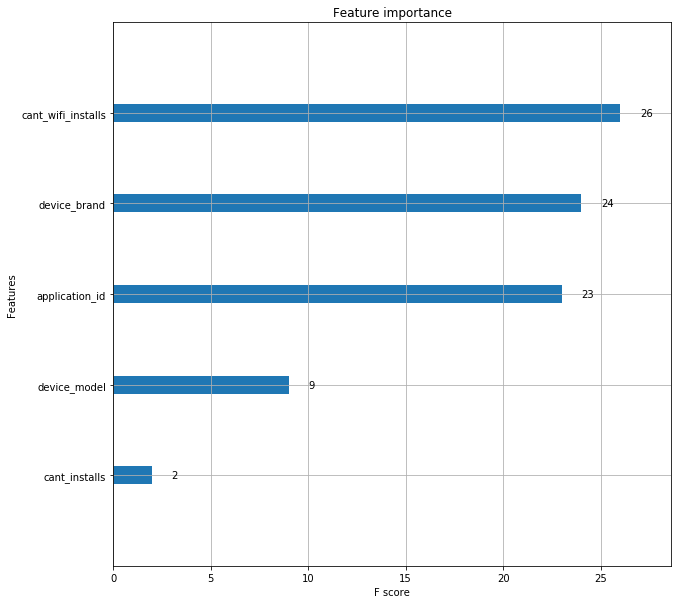

In [61]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [62]:
df = pd.DataFrame(ref_hashes)
df['predictions'] = preds


In [63]:
train2['ref_hash'] = df['ref_hash']
train2['pred_18_20'] = df['predictions']
Xtrain2 = train2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytrain2 = train2[['time_to_install']]

In [64]:
test2['ref_hash'] = df['ref_hash']
test2['pred_18_20'] = df['predictions']
Xtest2 = test2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytest2 = test2[['time_to_install']]

In [66]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [67]:
# Prediccion
preds2 = xg_reg.predict(Xtest2)

In [71]:
preds2

array([169399.33, 166032.6 ,  90910.28, ..., 166032.6 , 166032.6 ,
       166032.6 ], dtype=float32)

In [68]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

RMSE: 90779.923432


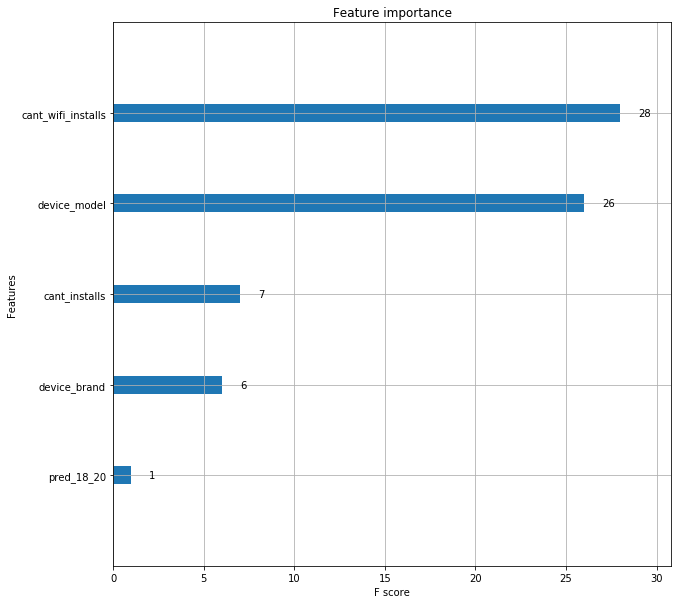

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [19]:
df = pd.DataFrame(ref_hashes)
df['predictions'] = preds
df.to_csv('../submit_kaggle/pred_installs.csv', index=False)